## Background

On the site of the widely-popular lodging service Airbnb, guests book rooms or accommodations directly from the owner. Once their stay is complete, guests are requested to review their experience, in order to provide feedback to the hosts and to inform future potential guests about the quality of their stay.

The reviews include several factors: accuracy, cleanliness, check-in, communication, location, value, and general rating. The outcome of a listing's review can impact the listing's popularity and visibility and are an indicator of the customer base's overall experience using the site. In order to facilitate good experiences for guests, there are insights to be gained from analyzing the ratings. Analyzing several factors for each listing can predict what will lead to a positive or negative review.

## The data

Airbnb captures data from these reviews, and the third party site Inside Airbnb has scraped and collected data to inform the general public about  the company. In this project, we focus on San Francisco, where Airbnb headquarters are located. Ideally, the analysis would span to urban and rural locations around the globe, using as close as possible to the full dataset.

The Inside Airbnb dataset contains not only the reviews, but in fact 92 variables for each listing. For the purpose of this analysis, we identify the most important fields as those relating to the price per night of the listing, room type, the review scores, the number of reviews, host acceptance rate, zipcode, and when the host joined. Notably, within the review scores, there are several fields, including accuracy, cleanliness, check-in, communication, location, and value.

Limitations to the data include that it is not entirely up to date. It is not constantly updated, and some of the data is older than one year. In this project, we assume that there will be no statistically significant difference between the current, live data and the slightly older scraped data, although ideally, analysis would involve the most current datasets. Also, the data is limited by the fact that it does not contain information on the guest, although the data containing this information would certainly warrant an examination as well. 


## The research question

The question I addressed in this project was: What predicts a positive or negative review on Airbnb? What variables are most important? Stemming from these questions, how can the site take actions or implement policies to prevent negative guest experiences and promote favorable ones?

## The preliminary/exploratory analysis and feature engineering

There was some minor wrangling that needed to be done for the dataset. The majority of the cleaning and wrangling work included selecting the important or relevant features, converting strings to floats, and cutting out the extraneous variables, such as precise address or longitude/latitude. To keep the data more manageable and more simple, we created a new dataframe that eliminates the extraneous variables.

To make the analysis more swift (in terms of processing speed and generally inspecting the data by eye), we cut down the data to include only 45 columns, roughly half of what the original data started as at 92 columns.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scs
import statsmodels.formula.api as smf

In [4]:
# opening and reading files
sf_lt = pd.read_csv('/Users/CamillaNawaz/Google Drive/Airbnb DATA/listings SF.csv', 
                    header = 0, dtype=
                    {43:str}, float_precision='high')

with open('/Users/CamillaNawaz/Google Drive/Airbnb DATA/listings SF.csv', 'r') as file:
    sf_lt = pd.read_csv(file, header=0, dtype={43:str, 'review_scores_rating':float}, float_precision='high')

In [5]:
# get some summary statistics
sf_lt.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,8.619000e+03,8.619000e+03,8.619000e+03,8617.000000,8617.000000,0.0,8619.000000,8619.000000,8619.000000,8571.000000,...,8619.000000,6287.000000,6265.000000,6270.000000,6266.000000,6271.000000,6267.000000,6266.000000,8619.000000,6396.000000
mean,7.077011e+06,2.016070e+13,1.802502e+07,5.271788,5.271788,NaN,37.767369,-122.430854,3.247360,1.308832,...,19.693352,94.002386,9.589306,9.413716,9.726939,9.749641,9.500558,9.302905,2.834552,1.693641
std,4.211083e+06,4.414319e-01,1.983930e+07,28.315964,28.315964,NaN,0.021762,0.025741,2.124207,0.655959,...,37.688566,7.931188,0.804510,0.976745,0.702270,0.668849,0.814874,0.864396,5.629219,1.722191
min,9.580000e+02,2.016070e+13,4.600000e+01,1.000000,1.000000,NaN,37.704234,-122.512968,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,3.197019e+06,2.016070e+13,2.937937e+06,1.000000,1.000000,NaN,37.753416,-122.442653,2.000000,1.000000,...,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000
50%,7.697664e+06,2.016070e+13,9.177164e+06,1.000000,1.000000,NaN,37.769680,-122.426036,2.000000,1.000000,...,4.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.010000
75%,1.081235e+07,2.016070e+13,2.802321e+07,2.000000,2.000000,NaN,37.783927,-122.413133,4.000000,1.500000,...,20.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.460000
max,1.380359e+07,2.016070e+13,8.111361e+07,845.000000,845.000000,NaN,37.829924,-122.364759,16.000000,8.000000,...,428.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,41.000000,13.000000


In [6]:
# pare it down to just the important columns
relevant_columns = ['id', 'interaction', 'house_rules', 'host_id', 'host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'require_guest_profile_picture', 'reviews_per_month']

trimmed_sf = sf_lt[relevant_columns]

trimmed_sf.describe()
# note relatively low (<1) std for all review columns.

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8.619000e+03,8.619000e+03,8617.000000,8619.000000,8571.000000,8613.000000,8609.000000,202.000000,8619.000000,8619.000000,8.619000e+03,8619.000000,6287.000000,6265.000000,6270.000000,6266.000000,6271.000000,6267.000000,6266.000000,6396.000000
mean,7.077011e+06,1.802502e+07,5.271788,3.247360,1.308832,1.354348,1.800441,966.425743,1.553661,4.375682,4.991261e+05,19.693352,94.002386,9.589306,9.413716,9.726939,9.749641,9.500558,9.302905,1.693641
std,4.211083e+06,1.983930e+07,28.315964,2.124207,0.655959,0.904556,1.372576,712.777133,1.229139,16.872935,3.271079e+07,37.688566,7.931188,0.804510,0.976745,0.702270,0.668849,0.814874,0.864396,1.722191
min,9.580000e+02,4.600000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020000
25%,3.197019e+06,2.937937e+06,1.000000,2.000000,1.000000,1.000000,1.000000,450.000000,1.000000,1.000000,2.900000e+01,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.410000
50%,7.697664e+06,9.177164e+06,1.000000,2.000000,1.000000,1.000000,1.000000,895.000000,1.000000,2.000000,1.125000e+03,4.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.010000
75%,1.081235e+07,2.802321e+07,2.000000,4.000000,1.500000,2.000000,2.000000,1287.500000,2.000000,3.000000,1.125000e+03,20.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.460000
max,1.380359e+07,8.111361e+07,845.000000,16.000000,8.000000,10.000000,16.000000,3300.000000,12.000000,1000.000000,2.147484e+09,428.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,13.000000


Additionally, we create a new column (mean_review_scores) that was a mean of all of the review columns, to have a good generalized number to look at.

In [7]:
# add column - mean of all ratings columns for each listing

from __future__ import division

trimmed_sf['mean_review_scores'] = 0
# fills entire new column with 0s

# fill column with each observation's mean of review scores
trimmed_sf['mean_review_scores'] = (trimmed_sf.review_scores_accuracy + trimmed_sf.review_scores_cleanliness + trimmed_sf.review_scores_checkin + trimmed_sf.review_scores_communication + trimmed_sf.review_scores_location + trimmed_sf.review_scores_value) / 6

# check the last column
trimmed_sf.head(3)

/Users/CamillaNawaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/CamillaNawaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,interaction,house_rules,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,reviews_per_month,mean_review_scores
0,11187767,I am available 24 hours a day during your stay.,"1. Smoking is NOT allowed in the Property, Com...",58242037,Jonathan,2016-02-10,within an hour,100%,100%,f,...,9.0,9.0,9.0,9.0,9.0,8.0,t,f,0.88,8.833333
1,6938818,I may not available in person to assist you du...,"1. No pets, no smoking inside the house. 2. F...",36381578,Harris,2015-06-21,within an hour,100%,100%,f,...,9.0,9.0,10.0,10.0,9.0,9.0,f,f,1.85,9.333333
2,9395222,NaN,*No smoking please *QUITE HOURS 10pm-9am pleas...,25963295,Tyler,2015-01-11,within an hour,100%,99%,f,...,9.0,9.0,10.0,10.0,10.0,9.0,t,f,5.87,9.500000


From there, we check the datatypes of each of the columns to see if any needed changing. Price and total price are listed as strings (objects), so we strip them of their special characters and convert into floats.

In [8]:
trimmed_sf.dtypes

id                                 int64
interaction                       object
house_rules                       object
host_id                            int64
host_name                         object
host_since                        object
host_response_time                object
host_response_rate                object
host_acceptance_rate              object
host_is_superhost                 object
host_listings_count              float64
host_verifications                object
host_has_profile_pic              object
host_identity_verified            object
neighbourhood                     object
zipcode                           object
property_type                     object
room_type                         object
accommodates                       int64
bathrooms                        float64
bedrooms                         float64
beds                             float64
bed_type                          object
amenities                         object
square_feet     

In [9]:
trimmed_sf['price'] = trimmed_sf['price'].map(lambda x: x.lstrip('$'))
trimmed_sf['price'] = trimmed_sf['price'].str.replace(',', '')
trimmed_sf['price'] = trimmed_sf['price'].astype(float)

trimmed_sf['weekly_price'] = trimmed_sf['weekly_price'].map(lambda x: x.lstrip('$'))
trimmed_sf['weekly_price'] = trimmed_sf['weekly_price'].str.replace(',', '')
trimmed_sf['weekly_price'] = trimmed_sf['weekly_price'].astype(float)

/Users/CamillaNawaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/CamillaNawaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/CamillaNawaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

AttributeError: 'float' object has no attribute 'lstrip'

To understand the magnitude of missing data, we calculate the percentage of None/NaN values for each field.

In [10]:
# find the % of each field that has Null/None values

from __future__ import division

trimmed_sf.isnull().sum()

percent_missing = trimmed_sf.isnull().sum() / len(trimmed_sf)
print(percent_missing) # translates the above into a proportion

id                               0.000000
interaction                      0.402599
house_rules                      0.297946
host_id                          0.000000
host_name                        0.000232
host_since                       0.000232
host_response_time               0.247825
host_response_rate               0.247825
host_acceptance_rate             0.270565
host_is_superhost                0.000232
host_listings_count              0.000232
host_verifications               0.000000
host_has_profile_pic             0.000232
host_identity_verified           0.000232
neighbourhood                    0.093514
zipcode                          0.009398
property_type                    0.000116
room_type                        0.000000
accommodates                     0.000000
bathrooms                        0.005569
bedrooms                         0.000696
beds                             0.001160
bed_type                         0.000000
amenities                        0

From there, we create a correlation matrix to understand the strength of the relationships between variables across the entire dataframe. The strongest correlations for the review_scores_rating column turn out to be the review ratings for each category. Specifically, the review category that was most closely correlated was review_scores_value.

In [11]:
# create correlation matrix
trimmed_sf.corr(method='pearson')

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,mean_review_scores
id,1.000000,0.514423,0.021592,-0.009468,0.010182,-0.024810,-0.006362,-0.076592,0.059705,-0.147780,...,-0.476418,-0.064226,-0.042934,-0.027080,-0.069736,-0.077906,0.012029,0.003233,0.152066,-0.040404
host_id,0.514423,1.000000,-0.037258,-0.014319,-0.026533,-0.017720,-0.008751,0.063017,0.042785,-0.066724,...,-0.216038,-0.132042,-0.080191,-0.058153,-0.089517,-0.099800,-0.065803,-0.059397,0.189978,-0.096484
host_listings_count,0.021592,-0.037258,1.000000,0.023455,0.043359,-0.077916,0.059632,-0.005362,-0.021187,-0.049565,...,-0.034864,-0.091526,-0.124096,-0.036038,-0.099842,-0.063641,-0.070722,-0.067371,-0.099578,-0.097542
accommodates,-0.009468,-0.014319,0.023455,1.000000,0.443392,0.714655,0.745842,0.436644,0.353459,0.438315,...,-0.056664,0.029737,-0.005266,0.034692,0.023257,0.007836,0.015286,-0.010899,-0.062573,0.015054
bathrooms,0.010182,-0.026533,0.043359,0.443392,1.000000,0.485717,0.508688,0.518653,0.242519,0.165218,...,-0.101912,-0.020479,-0.064392,-0.040824,-0.089771,-0.068739,-0.023654,-0.031379,-0.140108,-0.066551
bedrooms,-0.024810,-0.017720,-0.077916,0.714655,0.485717,1.000000,0.635157,0.541939,0.378161,0.406053,...,-0.088081,0.063749,0.026387,0.042938,0.022888,0.010015,0.017938,0.026156,-0.117181,0.033376
beds,-0.006362,-0.008751,0.059632,0.745842,0.508688,0.635157,1.000000,0.350458,0.247917,0.337602,...,-0.066541,0.018589,-0.040664,0.027953,-0.009350,-0.003340,-0.008276,-0.005095,-0.072571,-0.006884
square_feet,-0.076592,0.063017,-0.005362,0.436644,0.518653,0.541939,0.350458,1.000000,0.411188,0.449993,...,-0.271396,0.081043,0.026967,-0.012053,0.053829,0.026125,-0.045164,0.041969,-0.236055,0.015692
price,0.059705,0.042785,-0.021187,0.353459,0.242519,0.378161,0.247917,0.411188,1.000000,0.101380,...,-0.100923,0.119419,0.083785,0.095636,0.069263,0.048613,0.109190,0.043821,-0.128088,0.099763
guests_included,-0.147780,-0.066724,-0.049565,0.438315,0.165218,0.406053,0.337602,0.449993,0.101380,1.000000,...,0.082481,0.032652,0.040827,0.038544,0.045927,0.022143,0.004869,-0.007111,0.035078,0.030915


Additionally, we filter the data to include only ratings below the mean_review_score of 9, to see if there was any change in the correlation values and to consider how the models might change for lower reviews. As stated above, most of the data is clustered around high review ratings, but examining the lower ratings as a separate set of data showed that the correlation values in the mean_scores_review column were slightly lower, indicating that there is less of relationship. One might interpret that to mean that lower or negative reviews are harder to predict and more due to random chance. Overall, we see weaker correlations between the mean review scores and review categories, but slightly higher correlations between mean review scores and other variables, which is worth exploring.

In [12]:
low_sf = trimmed_sf[trimmed_sf['mean_review_scores'] < 9]

low_sf.corr(method='pearson')

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,mean_review_scores
id,1.000000,0.620167,-0.113660,0.038516,0.028443,0.022352,0.021344,0.050315,-0.005201,-0.037656,...,-0.397415,-0.283301,-0.190875,-0.140856,-0.134886,-0.183485,-0.071930,-0.308551,0.228314,-0.251689
host_id,0.620167,1.000000,-0.113258,-0.062681,0.041361,-0.027850,-0.082452,0.124708,-0.046384,-0.007066,...,-0.188445,-0.242718,-0.154631,-0.105705,-0.120375,-0.173394,-0.158984,-0.194895,0.219966,-0.222172
host_listings_count,-0.113660,-0.113258,1.000000,-0.013360,0.111226,-0.068784,0.124859,0.168698,-0.082198,-0.079991,...,-0.056543,-0.075923,-0.087312,0.033796,-0.093812,0.007886,-0.158633,0.008990,-0.125837,-0.070037
accommodates,0.038516,-0.062681,-0.013360,1.000000,0.274398,0.714691,0.756126,0.503126,0.487339,0.570777,...,-0.048949,0.064134,0.005544,0.056658,0.054901,0.029494,0.075158,-0.003287,-0.006371,0.055664
bathrooms,0.028443,0.041361,0.111226,0.274398,1.000000,0.271761,0.382828,0.663332,0.071696,0.105826,...,-0.126539,0.037715,-0.011143,0.009187,-0.081655,-0.062529,0.020500,0.001804,-0.123575,-0.030142
bedrooms,0.022352,-0.027850,-0.068784,0.714691,0.271761,1.000000,0.620173,0.621778,0.521166,0.559679,...,-0.091833,0.095376,0.058874,0.074577,0.037181,-0.021171,0.046546,0.048815,-0.077410,0.062138
beds,0.021344,-0.082452,0.124859,0.756126,0.382828,0.620173,1.000000,0.540836,0.339385,0.371079,...,-0.087619,0.107898,-0.012332,0.104897,0.061519,0.072691,0.024673,0.066174,-0.055991,0.080293
square_feet,0.050315,0.124708,0.168698,0.503126,0.663332,0.621778,0.540836,1.000000,0.393099,0.383990,...,-0.409151,0.372140,0.424009,0.337978,-0.146325,-0.321831,-0.031484,0.364439,0.174675,0.106483
price,-0.005201,-0.046384,-0.082198,0.487339,0.071696,0.521166,0.339385,0.393099,1.000000,0.447005,...,-0.122892,0.057236,-0.005276,0.000300,0.035358,-0.036432,0.081749,-0.050954,-0.125426,0.007273
guests_included,-0.037656,-0.007066,-0.079991,0.570777,0.105826,0.559679,0.371079,0.383990,0.447005,1.000000,...,0.038638,0.058285,0.056930,0.031972,0.049788,-0.031259,0.063850,0.010727,0.065296,0.045970


As a next step, we plot visualizations to better understand the spread of the data and the relationships between certain variables. One initial and significant finding was that the data is for the most part strongly clustered around high ratings; there is an abundance of perfect or near-perfect reviews, which leads one to believe that the value of a positive rating can potentially be cheapened.

We preliminarily explore and plot how select features are linked to higher or lower ratings. For instance, there does not seem to be a strong relationship between price and mean_review_scores, which is somewhat surprising. Later, we will see that there is a far stronger correlation between how the listing is rated in terms of value (review_scores_value).

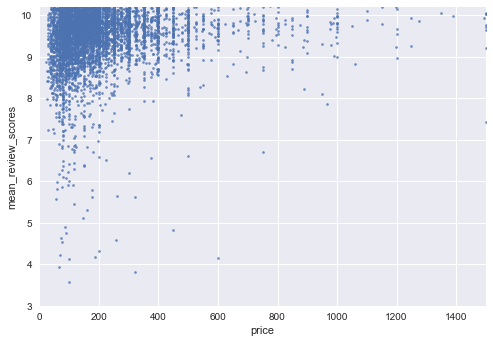

In [13]:
sns.regplot(x='price', y='mean_review_scores', data=trimmed_sf, fit_reg=False, scatter_kws={'s':7}, y_jitter=0.5)
plt.xlim(0,1500)
plt.ylim(3,10.2)
plt.show()
plt.clf()

The final round of plots compared each individual rating category to the final mean.

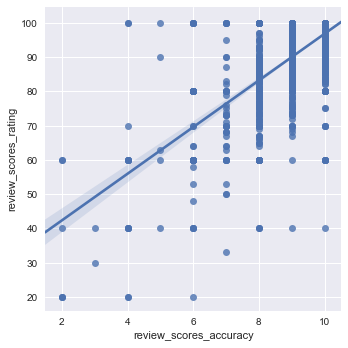

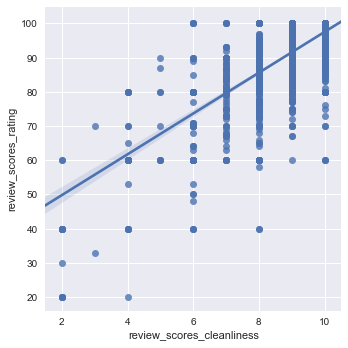

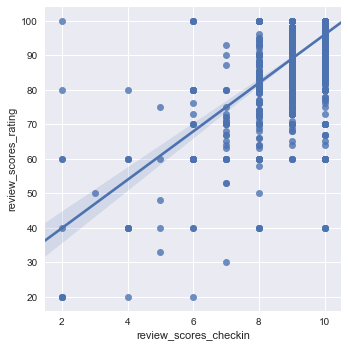

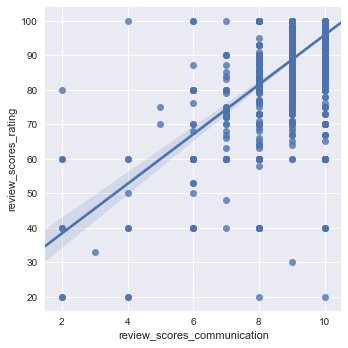

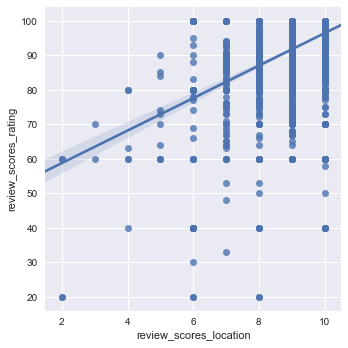

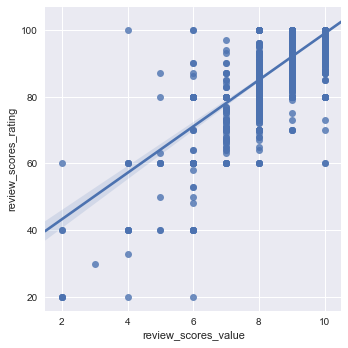

In [14]:
just_the_ratings = ['review_scores_rating', 
                    'review_scores_accuracy', 
                    'review_scores_cleanliness', 
                    'review_scores_checkin', 
                    'review_scores_communication', 
                    'review_scores_location', 
                    'review_scores_value',
                    'mean_review_scores']

ratings_trimmed_sf = trimmed_sf[just_the_ratings]

# for loop for each metric against the mean rating

for column in ratings_trimmed_sf:
    if column != 'mean_review_scores' and column != 'review_scores_rating':
        sns.lmplot(x=column, y='review_scores_rating', data=ratings_trimmed_sf)
        sns.plt.show()
        sns.plt.clf()

## The predictive models

This analysis used linear regression, using the ordinary least squares function of the package Statsmodels. To create the models, we first split the trimmed San Francisco data (trimmed_sf) into training and test data. The training data is to be 80% of the whole dataset, and 20% to be the test set.

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(trimmed_sf, test_size=0.2)

We build models by introducing variables from throughout the dataset, using the correlation matrix as a preliminary clue as to what is most tightly correlated. 

In [16]:
# start with the highest correlation outside of the review categories
# note that it's a low correlation and a low R-squared, meaning it's not a successful model
formula1 = 'review_scores_rating ~ number_of_reviews'
lm1 = smf.ols(formula1, data=train)

results1 = lm1.fit()
print results1.summary()

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     4.194
Date:                  Sat, 10 Jun 2017   Prob (F-statistic):             0.0406
Time:                          08:22:30   Log-Likelihood:                -17401.
No. Observations:                  5004   AIC:                         3.481e+04
Df Residuals:                      5002   BIC:                         3.482e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         

In [17]:
# highest 2 correlations inside review categories
formula2 = 'review_scores_rating ~ review_scores_value + review_scores_cleanliness'

lm2 = sm.ols(formula2, data=train)

results2 = lm2.fit()
print results2.summary()

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.684
Model:                              OLS   Adj. R-squared:                  0.684
Method:                   Least Squares   F-statistic:                     5394.
Date:                  Sat, 10 Jun 2017   Prob (F-statistic):               0.00
Time:                          08:22:33   Log-Likelihood:                -14478.
No. Observations:                  4989   AIC:                         2.896e+04
Df Residuals:                      4986   BIC:                         2.898e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
In

Ideally, the model would have more than just other review categories in it, so we bring in variables from across the dataset. Doing so, we make a more finalized model, attempting to incorporate both review categories and other variables as well. 

In [55]:
formula3 = 'review_scores_rating ~ C(host_is_superhost) + review_scores_value + review_scores_cleanliness'

lm3 = smf.ols(formula3, data=train)

results3 = lm3.fit()
print results3.summary()

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.684
Model:                              OLS   Adj. R-squared:                  0.684
Method:                   Least Squares   F-statistic:                     3604.
Date:                  Sat, 10 Jun 2017   Prob (F-statistic):               0.00
Time:                          09:03:54   Log-Likelihood:                -14474.
No. Observations:                  4989   AIC:                         2.896e+04
Df Residuals:                      4985   BIC:                         2.898e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
In

From here, we predict the ratings and examine to determine how the model performs.

In [70]:
import scipy as scs
predictions = results3.predict()
scs.stats.describe(predictions)

DescribeResult(nobs=4989, minmax=(36.023129831858178, 99.571593851324195), mean=94.000400881940223, variance=42.04751339899672, skewness=-2.73243532095787, kurtosis=13.444724641521319)

## Analysis and discussion of the models, suggestions for further research

Looking at the results, we see a number of findings and issues. First of all, what we can see from the first correlation matrix is that there are not strong relationships between factors outside of other review ratings and the generalized review_scores_rating, the overall rating a guest gives to his or her experience staying at the listing (the outcome variable). This is an interesting finding and suggests that there might be additional data that the company can collect that would better inform how they can predict ratings, prevent poor ratings, and capitalize on the findings from positive ratings.

To achieve better results, the company may wish to capture (and publish) more relevant data that may be more strongly correlated to the overall rating. It may be useful to have more than the 6 review categories, as there may be more revealing ratings categories, such as friendliness of host, comfort of accomodation, etc. 

One way to do so (that would be less burdensome for reviewers) would be to ask customers to tag their reviews. For instance, when writing a review, the site could ask the guest to select all tags that apply from a list, with items such as 'noisy', 'breakfast included', 'easy parking', etc. These data points could results in interesting logistic regression analyses that might allow the company to explore particular hypotheses in a way that would be easy for guests to contribute to.

Another interesting conclusion was that the value and cleanliness scores were the most highly correlated with the generalized review. This might suggest that the company should stress cleanliness for the accomodations, as well as have a solid and transparent pricing structure that guests feel is fair and accurate.

Another suggestion for analysis would be that the features be more heavily engineered or transformed. In all likelihood, it is not the case that the value of a review is predicted by random chance (which is what is slightly suggested by the low correlations in the matrix. Rather, the problem becomes making sure the data is engineered in the most useful way and the features needed are available.

To illustrate, one major limitation of the analysis was that the reviews were highly clustered between 9 to 10. A better way of handling the data that may provide more interesting insights may be to categorize ratings between 8 to 10 as 'good' and below 8 as 'fair/negative' and conduct a logistic regression. 

Finally, perhaps the most powerful method of prediction would be to conduct text analysis of customer reviews for each listing. This would provide a broader range of data on guests' experience, covering elements outside of the 6 ratings categories provided. By using text analysis and NLP, analysis could reveal an array of insights that would help inform the company what specifically predict a good or poor experience staying at a listing.

Using a couple of these recommendations, Airbnb may be able not only to more fully understand and prevent a guest's dissatisfaction with their experience, but also to capitalize on the positive experiences in order to replicate them as much as possible. 